# **Dataset Generation:**
Since the pixel with value 255 is randomly assigned, we can generate synthetic data for training the model. Each sample in the dataset will consist of a 50x50 grayscale image and the corresponding coordinates of the pixel with value 255.



***The choice to generate a synthetic dataset for this problem is based on several considerations:***

**Control and Simplicity:**

Generating synthetic data gives us complete control over the data distribution, ensuring that the pixel with value 255 is placed randomly in each image. This simplifies the problem since we know the exact position of the pixel in each image.

**Reproducibility:**

Synthetic data generation ensures that the results are reproducible. Anyone can recreate the dataset using the same random seed and generation process, which is crucial for debugging and model validation.

**Diversity:**

By generating a large number of images with the pixel randomly placed, we ensure that the dataset covers all possible positions of the pixel. This helps the model generalize well to unseen data.



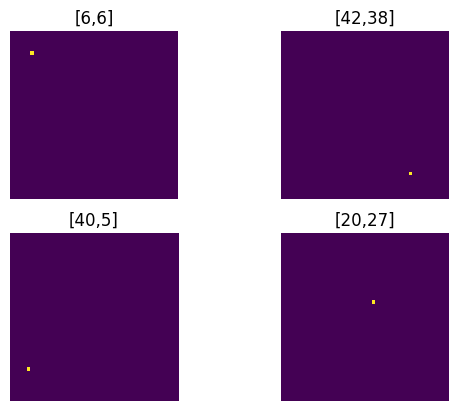

In [4]:
import numpy as np
import matplotlib.pyplot as plt
def generate_dataset(num_samples, img_size):
    images = np.zeros((num_samples, img_size, img_size), dtype=np.uint8)
    labels = np.zeros((num_samples, 2), dtype=np.int32)

    for i in range(num_samples):
        x, y = np.random.randint(0, img_size, size=2)
        images[i, x, y] = 255
        labels[i] = [x, y]

    return images, labels

# Generate dataset
num_samples = 10000
img_size = 50
images, labels = generate_dataset(num_samples, img_size)

for i in range(0,4):
  plt.subplot(2,2,i+1)
  plt.imshow(images[i])
  plt.title("["+str(labels[i,0])+","+str(labels[i,1])+"]")
  plt.axis('off')


# **Generating data with Synthetic Data with Variations**




***While the synthetic data generation method described is effective, there are other ways to generate or enhance the dataset:***

Using various techniques to generate datasets can significantly improve a model's performance, robustness, and applicability to real-world scenarios. Here's a detailed explanation of how each technique contributes to these aspects:

**Exposure to Variability:** By training on varied datasets, the model learns to handle different scenarios, making it robust to changes in input data. This robustness is crucial for real-world applications where data is rarely perfect or consistent.

**Error Handling:** Augmentation and hybrid datasets introduce imperfections intentionally, teaching the model to manage errors and uncertainties. This training helps the model maintain performance even when faced with noisy or incomplete data.

**Enhanced Generalization:** A diverse training set helps the model generalize better to new, unseen data. Generalization is essential for real-world applications, ensuring the model can adapt to different environments and conditions without significant performance degradation.

**Simulating Real-World Conditions:** Transformation techniques simulate real-world conditions like noise, blur, and varying lighting. Training with such data prepares the model to operate effectively in real-world scenarios where such conditions are common.





# **Noise Addition:**

Adding a small amount of noise to the images can make the problem more realistic and challenging, potentially improving the model’s robustness. Noise can be Gaussian, salt-and-pepper, or any other type of noise.


(-0.5, 49.5, 49.5, -0.5)

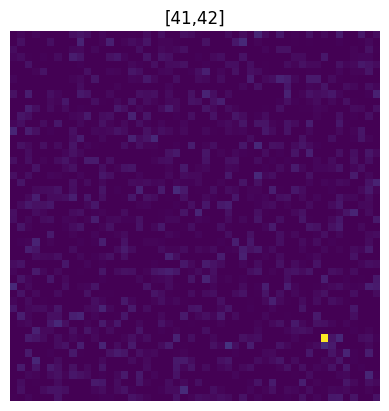

In [6]:
import cv2
def generate_noisy_image(img_size):
    image = np.zeros((img_size, img_size), dtype=np.uint8)
    x, y = np.random.randint(0, img_size, size=2)
    image[x, y] = 255
    # Adding Gaussian noise
    noise = np.random.normal(0, 10, (img_size, img_size))
    noisy_image = image + noise
    noisy_image = np.clip(noisy_image, 0, 255)
    return noisy_image, [x, y]

noisy_images, noisy_labels = generate_noisy_image(img_size)
plt.imshow(noisy_images)
plt.title("["+str(noisy_labels[0])+","+str(noisy_labels[1])+"]")
plt.axis('off')


# **Synthetic Data with Variations:**

Instead of having strictly one pixel set to 255, we could introduce slight variations. For example, the pixel could have values slightly less than 255 (e.g., 250-255) to simulate variations in intensity.


(-0.5, 49.5, 49.5, -0.5)

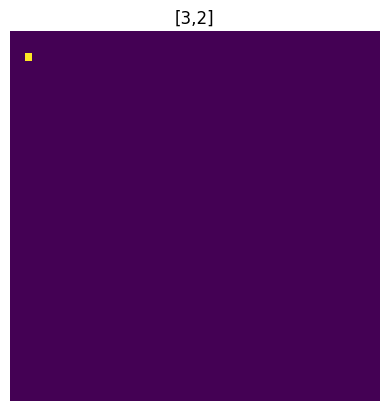

In [7]:
def generate_varied_intensity_image(img_size):
    image = np.zeros((img_size, img_size), dtype=np.uint8)
    x, y = np.random.randint(0, img_size, size=2)
    image[x, y] = np.random.randint(250, 256)  # Pixel intensity between 250 and 255
    return image, [x, y]

varied_images, varied_labels = generate_varied_intensity_image(img_size)
plt.imshow(varied_images)
plt.title("["+str(varied_labels[0])+","+str(varied_labels[1])+"]")
plt.axis('off')



# **Image Transformation Techniques:**

Apply transformations such as blurring, sharpening, or applying filters to make the dataset more challenging. These transformations can help the model learn more robust features.


(-0.5, 49.5, 49.5, -0.5)

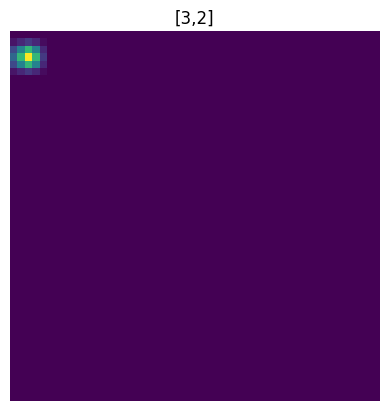

In [8]:
def apply_transformations(image):
    # Blurring the image
    blurred_img = cv2.GaussianBlur(image, (5, 5), 0)

    # Sharpening the image
    kernel = np.array([[0, -1, 0], [-1, 5,-1], [0, -1, 0]])
    sharpened_img = cv2.filter2D(image, -1, kernel)

    return [blurred_img, sharpened_img]

transformed_images = apply_transformations(varied_images)
plt.imshow(transformed_images[0])
plt.title("["+str(varied_labels[0])+","+str(varied_labels[1])+"]")
plt.axis('off')

# **ASSIGNMENT SOLUTION MODEL AND OUTPUT**

Epoch 1/100
250/250 [==============================] - 79s 307ms/step - loss: 242.3740 - mae: 13.1434 - val_loss: 214.6004 - val_mae: 12.2606
Epoch 2/100
250/250 [==============================] - 74s 297ms/step - loss: 115.6427 - mae: 7.9466 - val_loss: 106.3718 - val_mae: 8.2881
Epoch 3/100
250/250 [==============================] - 83s 334ms/step - loss: 136.6458 - mae: 8.5458 - val_loss: 144.0468 - val_mae: 10.1919
Epoch 4/100
250/250 [==============================] - 72s 287ms/step - loss: 87.5689 - mae: 6.5724 - val_loss: 89.3101 - val_mae: 7.7295
Epoch 5/100
250/250 [==============================] - 74s 295ms/step - loss: 75.0249 - mae: 5.8690 - val_loss: 74.1385 - val_mae: 6.6296
Epoch 6/100
250/250 [==============================] - 71s 284ms/step - loss: 71.9957 - mae: 5.6773 - val_loss: 92.7011 - val_mae: 7.8854
Epoch 7/100
250/250 [==============================] - 73s 291ms/step - loss: 69.9028 - mae: 5.4920 - val_loss: 99.8930 - val_mae: 8.2451
Epoch 8/100
250/250 [====

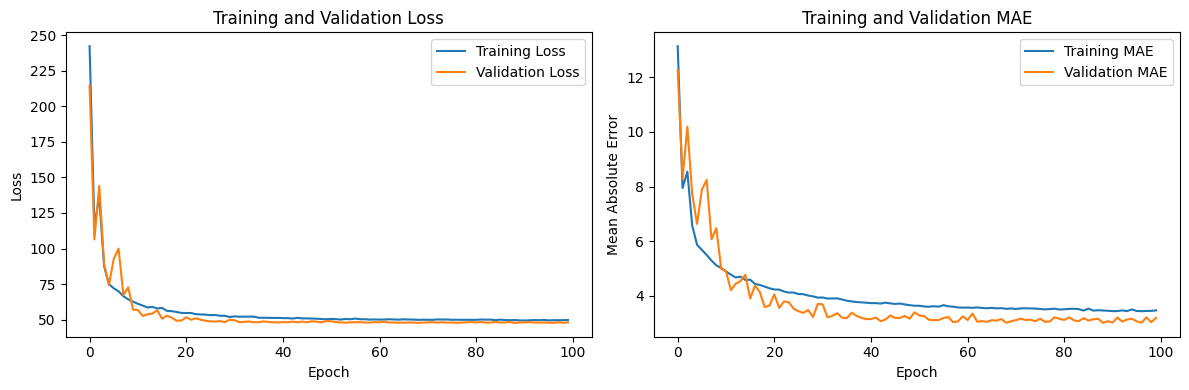

32/32 [==============================] - 3s 81ms/step
Mean Absolute Error (MAE) on test dataset: 3.1625


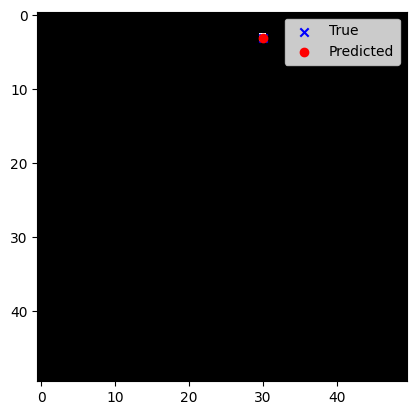

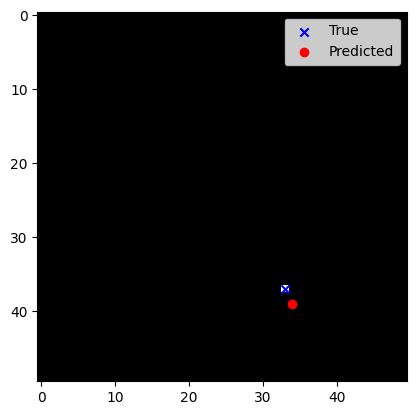

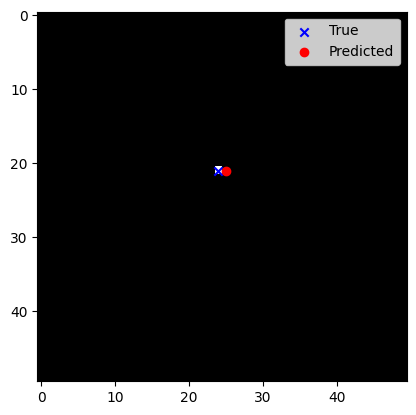

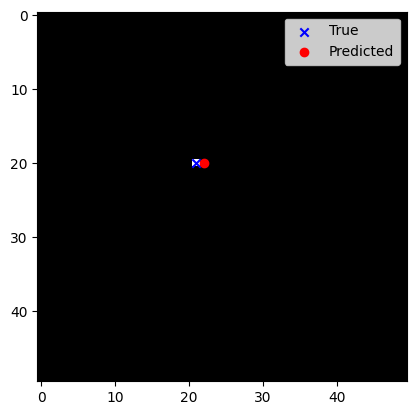

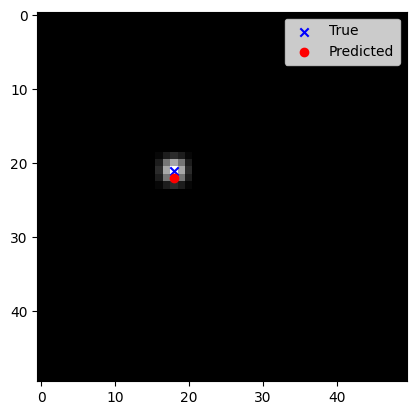

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

def generate_varied_intensity_image(img_size):
    """Generate an image with a single pixel of varied intensity."""
    image = np.zeros((img_size, img_size), dtype=np.uint8)
    x, y = np.random.randint(0, img_size, size=2)
    image[x, y] = np.random.randint(250, 256)
    return image, [x, y]

def apply_transformations(image):
    """Apply blurring and sharpening transformations to the image."""
    blurred_img = cv2.GaussianBlur(image, (5, 5), 0)
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    sharpened_img = cv2.filter2D(image, -1, kernel)
    return [blurred_img, sharpened_img]

def generate_combined_dataset(num_samples, img_size):
    """Generate a combined dataset with varied and transformed images."""
    images, labels = [], []
    for _ in range(num_samples):
        img, coords = generate_varied_intensity_image(img_size)
        if np.random.rand() < 0.5:
            transformed_imgs = apply_transformations(img)
            img = transformed_imgs[np.random.randint(0, len(transformed_imgs))]
        images.append(img)
        labels.append(coords)
    return np.array(images, dtype=np.uint8), np.array(labels, dtype=np.int32)

def create_model(input_shape):
    """Create a more complex CNN model for predicting pixel coordinates."""
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=input_shape))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.25))

    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(2))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

def plot_image_with_prediction(image, true_coords, predicted_coords):
    """Plot an image with true and predicted coordinates."""
    plt.imshow(image.squeeze(), cmap='gray')
    plt.scatter(true_coords[1], true_coords[0], c='blue', label='True', marker='x')
    plt.scatter(predicted_coords[1], predicted_coords[0], c='red', label='Predicted', marker='o')
    plt.legend()
    plt.show()

def main():
    # Generate combined dataset
    num_samples, img_size = 10000, 50
    combined_images, combined_labels = generate_combined_dataset(num_samples, img_size)

    # Create the model
    input_shape = (img_size, img_size, 1)
    model = create_model(input_shape)

    # Preprocess the images
    combined_images = combined_images.reshape((num_samples, img_size, img_size, 1)) / 255.0

    # Split the data into training and validation sets
    split_idx = int(0.8 * num_samples)
    train_images, val_images = combined_images[:split_idx], combined_images[split_idx:]
    train_labels, val_labels = combined_labels[:split_idx], combined_labels[split_idx:]

    # Train the model
    history = model.fit(train_images, train_labels, epochs=100, batch_size=32, validation_data=(val_images, val_labels))

    # Plot training history
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Training MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error')
    plt.legend()
    plt.title('Training and Validation MAE')
    plt.tight_layout()
    plt.show()

    # Generate test dataset
    num_test_samples = 1000
    test_images, test_labels = generate_combined_dataset(num_test_samples, img_size)

    # Preprocess the test images
    test_images = test_images.reshape((num_test_samples, img_size, img_size, 1)) / 255.0

    # Make predictions on the test dataset
    predicted_labels = model.predict(test_images)

    # Round the predicted coordinates to the nearest integers
    predicted_labels = np.round(predicted_labels).astype(int)

    # Calculate Mean Absolute Error (MAE) on test dataset
    mae = np.mean(np.abs(predicted_labels - test_labels))
    print(f'Mean Absolute Error (MAE) on test dataset: {mae}')

    # Plot a few test images with true and predicted coordinates
    for i in range(5):
        plot_image_with_prediction(test_images[i], test_labels[i], predicted_labels[i])

if __name__ == "__main__":
    main()